# Maxime BACQUET et Mathieu CARON

## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

On charge les données du training set

In [2]:
# Chargement des données
train = np.loadtxt('synth_train.txt')

# On prend les labels
class_train = train[:,0]
# On prend les coordonnées
x_train = train[:,1:]
N_train = train.shape[0]

On peut faire un affichage pour avoir une visualisation de nos données d'entrainement

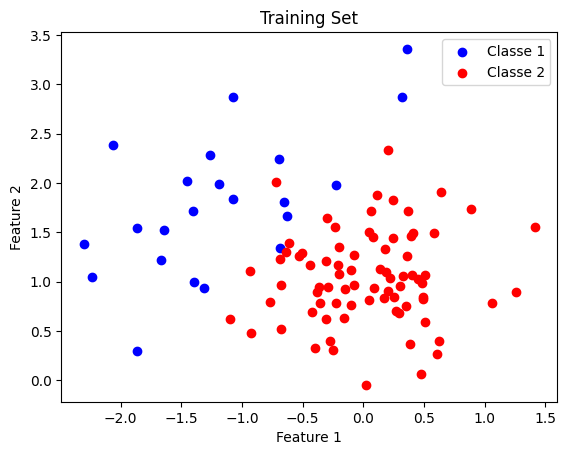

In [3]:
# Affichage de l'ensemble d'entraînement

# On sépare les échantillons par classe
class_1 = x_train[class_train == 1]
class_2 = x_train[class_train == 2]

# On affiche l'ensemble d'entraînement
plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Classe 1')
plt.scatter(class_2[:,0], class_2[:,1], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set')
plt.legend()

plt.savefig("img/training_set.png")
plt.show()

On observe bien que les deux classes sont distinctes, il est donc cohérent d'essayer de construire un modèle de classification

On charge les données du test set

In [4]:
test = np.loadtxt('synth_test.txt')

# On définit nos deux classes 1 et 2
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]

# On prend les coordonnées
x_test = test[:,1:]
N_test = test.shape[0]

On peut aussi faire un affichage pour avoir une visualisation de nos données de test

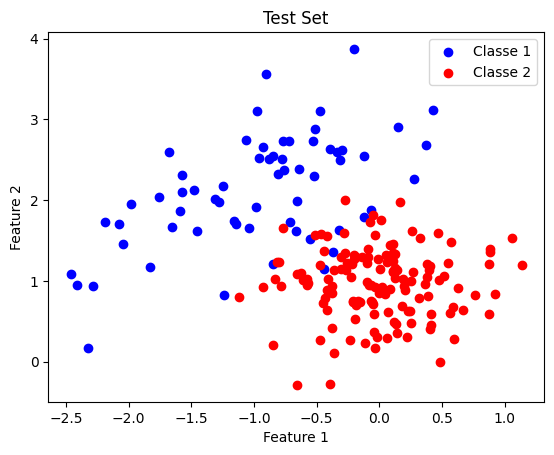

In [5]:
# On affiche le test set pour vérifier que l'import a bien fonctionné et pour avoir une visualisation de notre set de test
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set')
plt.legend()
plt.savefig("img/test_set.png")
plt.show()

Nos données ressemblent bien aux données d'entrainement. Nous pouvons maintenant commencer à concevoir nos modèles de classification

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [14]:
# Question 1

# Découpage des data en deux tableaux, en fonction de la classe
train_features = train[:, 1:]
test_features = test[:, 1:]

train_labels = train[:, 0]
test_labels = test[:, 0]

# Calcul du nombre de données (total, classe 1 et classe 2)
N = len(train)
N1 = np.sum(train[:, 0] == 1)
N2 = N - N1

# Calcul des pi
pi_1 = N1 / N
pi_2 = 1 - pi_1

# Calcul des mu
mu_1 = np.mean(train[train[:,0] == 1][:, 1:], axis=0)
mu_2 = np.mean(train[train[:,0] == 2][:, 1:], axis=0)

# Calcul des sigma
# Pour la QDA
sigma_1 = np.cov(train[train[:, 0] == 1][:, 1:], rowvar=False)
sigma_2 = np.cov(train[train[:, 0] == 2][:, 1:], rowvar=False)

# Pour la LDA
sigma = 1/N *(N1 * sigma_1 + N2 * sigma_2)

In [6]:
# On définit la fonction lda avec la formule vu en cours
def lda_classifier(x):
    d1 = np.dot(np.dot(x.T, np.linalg.inv(sigma)), mu_1) + np.log(pi_1) - 0.5 * np.dot(np.dot(mu_1.T, np.linalg.inv(sigma)), mu_1)
    d2 = np.dot(np.dot(x.T, np.linalg.inv(sigma)), mu_2) + np.log(pi_2) - 0.5 * np.dot(np.dot(mu_2.T, np.linalg.inv(sigma)), mu_2)
    return 1 if d1 > d2 else 2

In [7]:
# On définit la fonction qda avec la formule vu en cours
def qda_classifier(x):
    d1 = -0.5 * np.log(np.linalg.det(sigma_1)) - 0.5 * np.dot(np.dot((x - mu_1).T, np.linalg.inv(sigma_1)), (x - mu_1)) + np.log(pi_1)
    d2 = -0.5 * np.log(np.linalg.det(sigma_2)) - 0.5 * np.dot(np.dot((x - mu_2).T, np.linalg.inv(sigma_2)), (x - mu_2)) + np.log(pi_2)
    return 1 if d1 > d2 else 2

In [8]:
# number of samples for display
Nx1=100
Nx2=100

x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis

[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

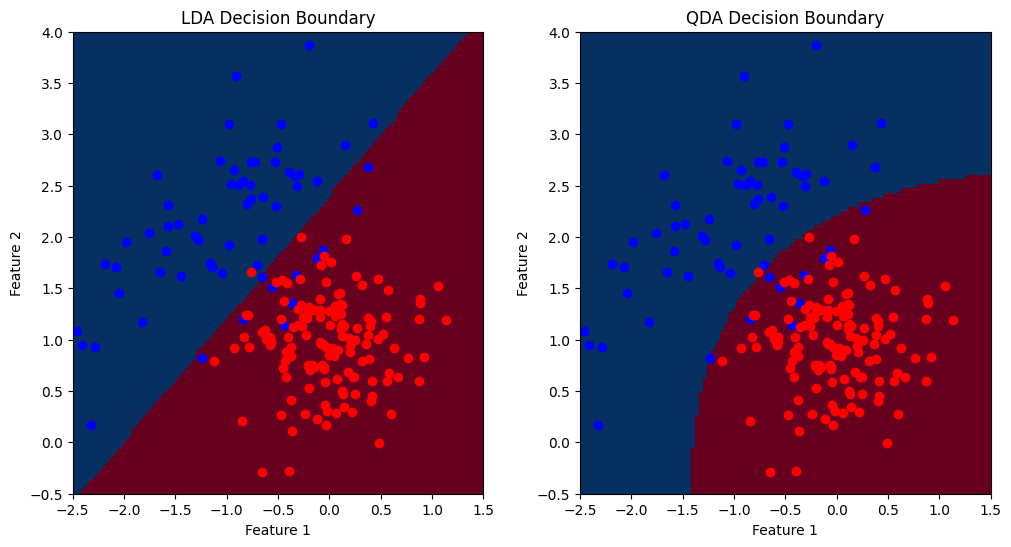

In [13]:
# For graphical representation  use code below for instance :
# Initialize arrays for class predictions
class_L_lda = np.zeros((Nx2, Nx1))
class_L_qda = np.zeros((Nx2, Nx1))

# Fill in class predictions for LDA
for i in range(Nx2):
    for j in range(Nx1):
        class_L_lda[i, j] = lda_classifier(np.array([x1[j], x2[i]]))

# Fill in class predictions for QDA
for i in range(Nx2):
    for j in range(Nx1):
        class_L_qda[i, j] = qda_classifier(np.array([x1[j], x2[i]]))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(class_L_lda, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')
plt.title("LDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.imshow(class_L_qda, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')
plt.title("QDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.savefig("img/lda_and_qda.png")

plt.show()

On observe bien que la LDA définit un hyperplan linéaire qui sépare nos deux classes. On observe principalement que quelques points bleus sont mal classifiés car ils sont dans la zone rouge. 

Pour la QDA, notre spérateur entre les deux classes a bien une allure quadratique et on peut observer que cela nous permet de mieux classifier certains points bleus

Maintenant on peut regarder les taux d'erreurs pour le test set et le training set

In [15]:
# Calcul des erreurs
def calculate_error_rate(classifier, features, labels):
    predictions = [classifier(x) for x in features]
    misclassified = np.sum(predictions != labels)
    return misclassified / len(labels)

In [17]:
# Calcul des erreurs pour LDA
train_error_lda = calculate_error_rate(lda_classifier, train_features, train_labels)
test_error_lda = calculate_error_rate(lda_classifier, test_features, test_labels)

print("Taux d'erreur d'entraînement (LDA) :", train_error_lda, "%")
print("Taux d'erreur de test (LDA) :", test_error_lda, "%")

train_error_qda = calculate_error_rate(qda_classifier, train_features, train_labels)
test_error_qda = calculate_error_rate(qda_classifier, test_features, test_labels)

print("Taux d'erreur d'entraînement (QDA) :", train_error_qda, "%")
print("Taux d'erreur de test (QDA) :", test_error_qda, "%")

Taux d'erreur d'entraînement (LDA) : 0.03 %
Taux d'erreur de test (LDA) : 0.055 %
Taux d'erreur d'entraînement (QDA) : 0.05 %
Taux d'erreur de test (QDA) : 0.05 %


On obtient des erreurs d'entrainement inférieur aux erreurs de test ce qui est normal car nous avons tout simplement entrainé nos modèles sur l'ensemble d'entrainement. 

Toutefois, nos erreurs sur les ensembles de test sont faibles ce qui montrent que nos modèles LDA et QDA sont pertinents. 

Et si nous comparons les deux modèles, le modèle QDA est légèrement mieux que le modèle LDA car il a un taux d'erreur plus faible sur l'ensemble de test.

On peut desormais regarder les résultats avec l'algo KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Choose different values of k
k_values = [1, 3, 5, 7] 

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_features, train_labels)
    knn_predictions = knn_classifier.predict(test_features)
    accuracy = accuracy_score(test_labels, knn_predictions)
    print("k-NN (k={}) Accuracy: {:.2f}".format(k, accuracy))


k-NN (k=1) Accuracy: 0.94
k-NN (k=3) Accuracy: 0.95
k-NN (k=5) Accuracy: 0.94
k-NN (k=7) Accuracy: 0.93


On obtient des résultats très bon avec KNN aussi, notamment avec K = 3 où l'on a une accuracy de 0.95.

In [20]:
# On redéfinit notre classifier KNN avec K = 3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_features, train_labels)
knn_predictions = knn_classifier.predict(test_features)

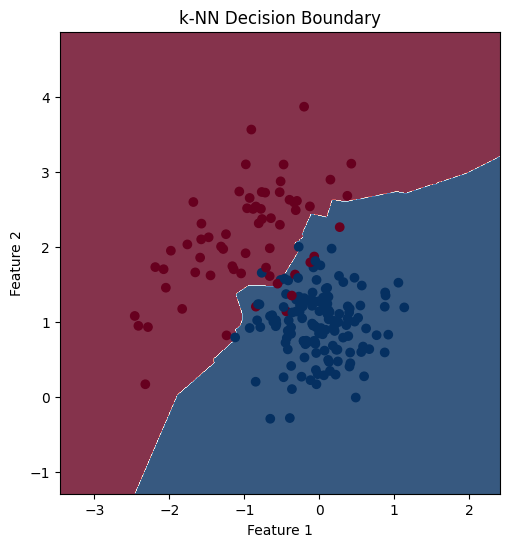

In [22]:
# Define the range of x1 and x2 values for the grid
x1_min, x1_max = min(train_features[:, 0].min(), test_features[:, 0].min()) - 1, max(train_features[:, 0].max(), test_features[:, 0].max()) + 1
x2_min, x2_max = min(train_features[:, 1].min(), test_features[:, 1].min()) - 1, max(train_features[:, 1].max(), test_features[:, 1].max()) + 1

# Create a grid of points
x1_values, x2_values = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
grid_points = np.c_[x1_values.ravel(), x2_values.ravel()]

# Get predictions for k-NN
knn_predictions = knn_classifier.predict(grid_points)

# Reshape the predictions for plotting
knn_predictions = knn_predictions.reshape(x1_values.shape)

# Create a subplot for the k-NN decision boundaries
plt.figure(figsize=(6, 6))

plt.imshow(knn_predictions, extent=(x1_min, x1_max, x2_min, x2_max), origin='lower', cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(test_features[:, 0], test_features[:, 1], c=test_labels, cmap=plt.cm.RdBu, label='Test Data')
plt.title("k-NN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.savefig("img/knn.png")

plt.show()

On observe que la frontière de décision n'est pas linéaire ou quadratique comme la LDA et QDA. Sa forme s'adapte plus aux points, il faut donc faire attention au surappentissage des données, c'est pourquoi nous essayons notre classifier sur un ensemble de test

In [26]:
test_error_lda = np.sum(knn_predictions != test_labels) / len(test_labels)
print("Taux d'erreur de test (KNN) :", test_error_lda, "%")

Taux d'erreur de test (KNN) : 0.005 %


C:\Users\mathc\AppData\Local\Temp\ipykernel_21084\1722154601.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  test_error_lda = np.sum(knn_predictions != test_labels) / len(test_labels)


Notre taux d'erreur avec KNN avec K = 3 est plus bas qu'avec LDA et QDA. Notre modèle KNN est donc meilleur.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




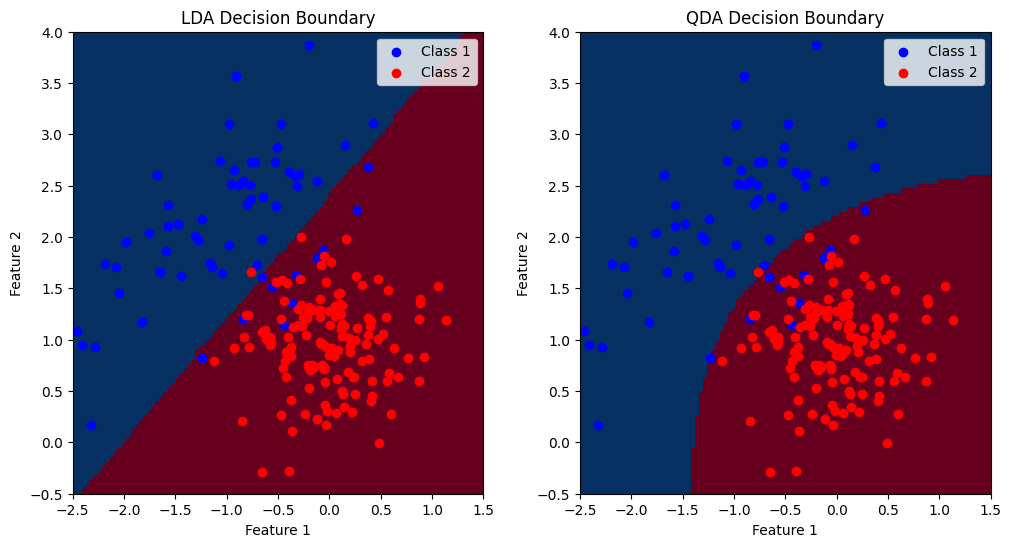

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Create instances of the LDA and QDA classifiers
lda_classifier = LinearDiscriminantAnalysis()
qda_classifier = QuadraticDiscriminantAnalysis()

# Fit the classifiers to your training data
lda_classifier.fit(train_features, train_labels)
qda_classifier.fit(train_features, train_labels)

lda_predictions = lda_classifier.predict(test_features)
qda_predictions = qda_classifier.predict(test_features)

grid_points = np.c_[X1.ravel(), X2.ravel()]

# Get predictions for LDA and QDA
lda_grid_predictions = lda_classifier.predict(grid_points)
qda_grid_predictions = qda_classifier.predict(grid_points)

# Reshape the predictions for plotting
lda_grid_predictions = lda_grid_predictions.reshape(X1.shape)
qda_grid_predictions = qda_grid_predictions.reshape(X2.shape)

# Create subplots for LDA and QDA decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(lda_grid_predictions, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:, 1], class_test_1[:, 2], c='blue', label='Class 1')
plt.scatter(class_test_2[:, 1], class_test_2[:, 2], c='red', label='Class 2')
plt.title("LDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(qda_grid_predictions, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:, 1], class_test_1[:, 2], c='blue', label='Class 1')
plt.scatter(class_test_2[:, 1], class_test_2[:, 2], c='red', label='Class 2')
plt.title("QDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.savefig("lda_qda_scikit_learn.png")

plt.show()


On obtient des résultats similaires qu'avec notre implémentation. regardons les taux d'erreurs pour notre ensemble de test et de train

In [31]:
# Ensemble de test
lda_predictions = lda_classifier.predict(test_features)
qda_predictions = qda_classifier.predict(test_features)

test_error_lda_scikit = np.sum(lda_predictions != test_labels) / len(test_labels)
print("Taux d'erreur de lda (scikit) :", test_error_lda_scikit, "%")
test_error_qda_scikit = np.sum(qda_predictions != test_labels) / len(test_labels)
print("Taux d'erreur de qda (scikit) :", test_error_qda_scikit, "%")

# Ensemble de train
lda_predictions_train = lda_classifier.predict(train_features)
qda_predictions_train = qda_classifier.predict(train_features)

test_error_lda_scikit_train = np.sum(lda_predictions_train != train_labels) / len(train_labels)
print("Taux d'erreur de lda (scikit) - train :", test_error_lda_scikit_train, "%")
test_error_qda_scikit_train = np.sum(qda_predictions_train != train_labels) / len(train_labels)
print("Taux d'erreur de qda (scikit) - train :", test_error_qda_scikit_train, "%")

Taux d'erreur de lda (scikit) : 0.055 %
Taux d'erreur de qda (scikit) : 0.05 %
Taux d'erreur de lda (scikit) - train : 0.03 %
Taux d'erreur de qda (scikit) - train : 0.05 %


Nous avons exactement les mêmes erreurs que notre implementation de LDA et QDA, cela montre que notre implementation est bien correcte.